In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier
import json
import sys
import requests
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [123]:
with open('data/modeling_data.pkl', 'rb') as f:
    df = pkl.load(f)

In [124]:
df.drop(['delayed_1','delayed_2','delayed_3','delayed_4',
         'delayed_5','delayed_6','delayed_7','delayed_42_st_S'],axis=1,inplace=True)

# GSV

First, on the entire df, just to see how close we are

In [126]:
X = df[features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [127]:
X = df.drop('delayed_irt',axis=1)
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

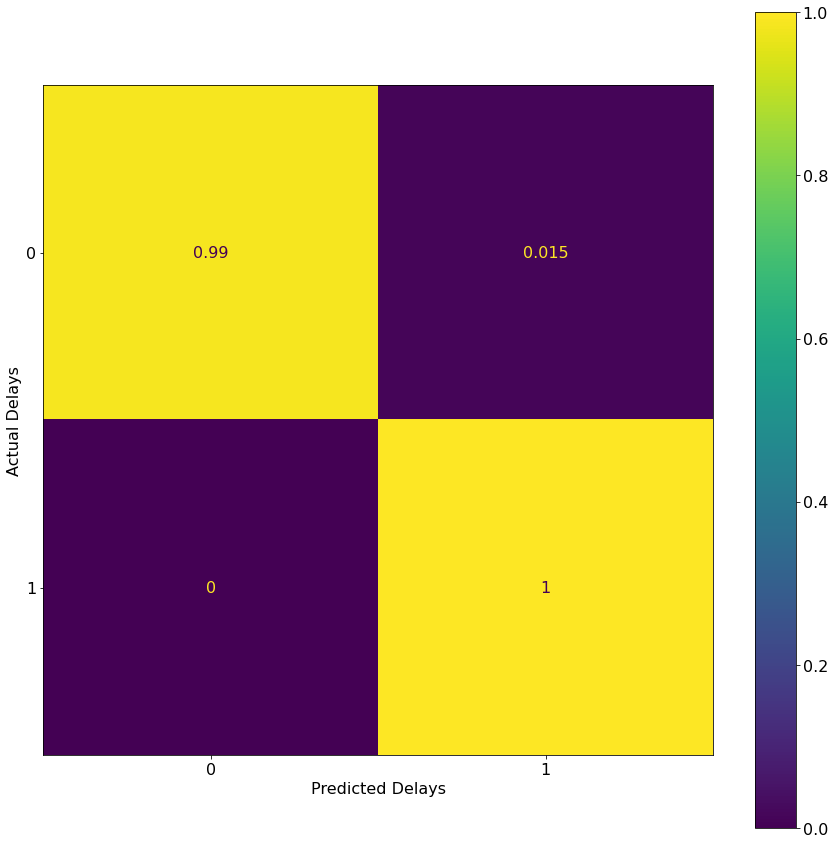

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.9910026943802925
0.9887238447468393


In [128]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
ax.set_title('Predicting IRT Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

# Not using entire df, just the features

In [129]:
features = ['rush_hour', 'weekend', 'mon', 'tue', 'wed', 'th', 'fri', 'bronx', 'brooklyn',
            'manhattan', 'queens','direction_bronx', 'direction_brooklyn', 'causes_station',
            'causes_train', 'causes_weather', 'causes_passenger', 'causes_other','direction_manhattan',
            'direction_queens', 'direction_unspecified', 'fastest_wind_spd','avg_wind_spd', 'major_conditions',
            'minor_conditions', 'neutral_conditions', 'clear_conditions', 'max_temp', 'avg_temp', 'min_temp',
            'prcp', 'snowfall', 'snowfall_depth']

In [130]:
X = df[features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

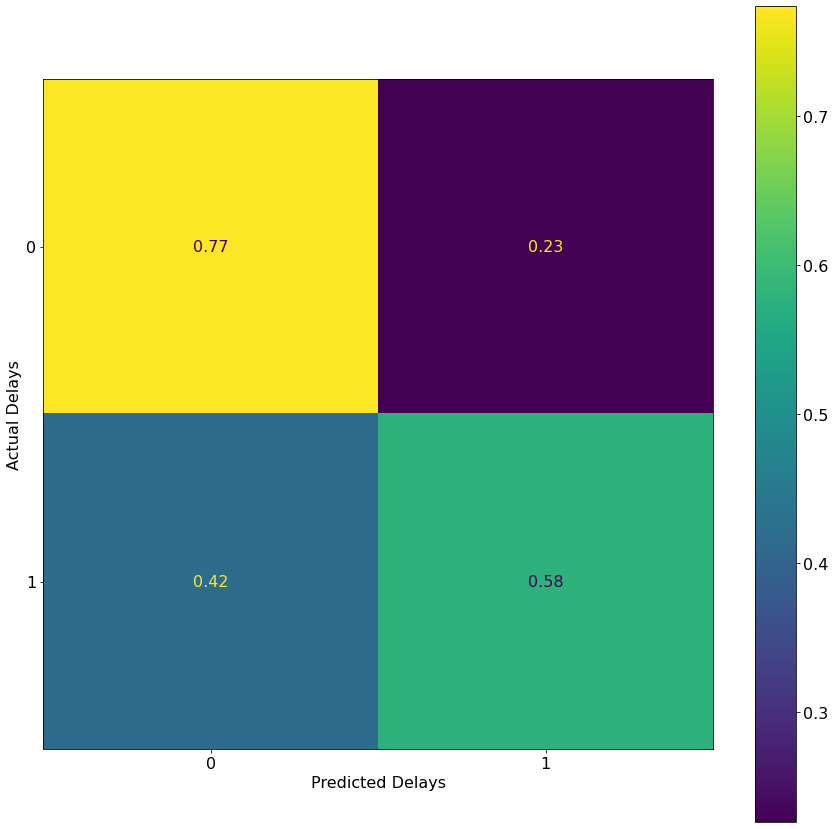

Pipeline(steps=[('bnb', BernoulliNB(alpha=0.5))])
0.6970105209135232
0.6006763897696047


In [133]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='f1')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

# Testing other models

In [147]:
print(lr.get_params().keys(),
      '\n\n',
      lr.get_params().values())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']) 

 dict_values([1.0, None, False, True, 1, None, 100, 'auto', None, 'l2', None, 'lbfgs', 0.0001, 0, False])


In [ ]:
parameters = {'LR__C':[.1,1,20,50],
         'LR__solver':['lbfgs', 'liblinear', 'sag'],
         'LR__class_weight':[None,'balanced',.25]}

In [164]:
lr = LogisticRegression()
scaler = StandardScaler()

params = {'C':[1,.1,.5,.25],
         'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

pipe = Pipeline(steps=[('scaler',StandardScaler()),('lr',LogisticRegression())])
pipe.fit(X_train,y_train)
gsv = GridSearchCV(pipe, params,scoring='accuracy')
gsv.fit(X_train, y_train)


ValueError: Invalid parameter C for estimator Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
lr = LogisticRegression()
scaler = StandardScaler()
parameters = {'LR__C':[.1,1,20,50],
         'LR__solver':['lbfgs', 'liblinear', 'sag'],
         'LR__class_weight':[None,'balanced',.25]}

pipe = Pipeline(steps=[('scaler'),('lr')])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
ax.set_title('Predicting IRT Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

# Testing on a most used stations

## Times Sq-42 St

In [165]:
X = df[features]
y = df['times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [166]:
y.value_counts()

0    66491
1    16646
Name: times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W), dtype: int64

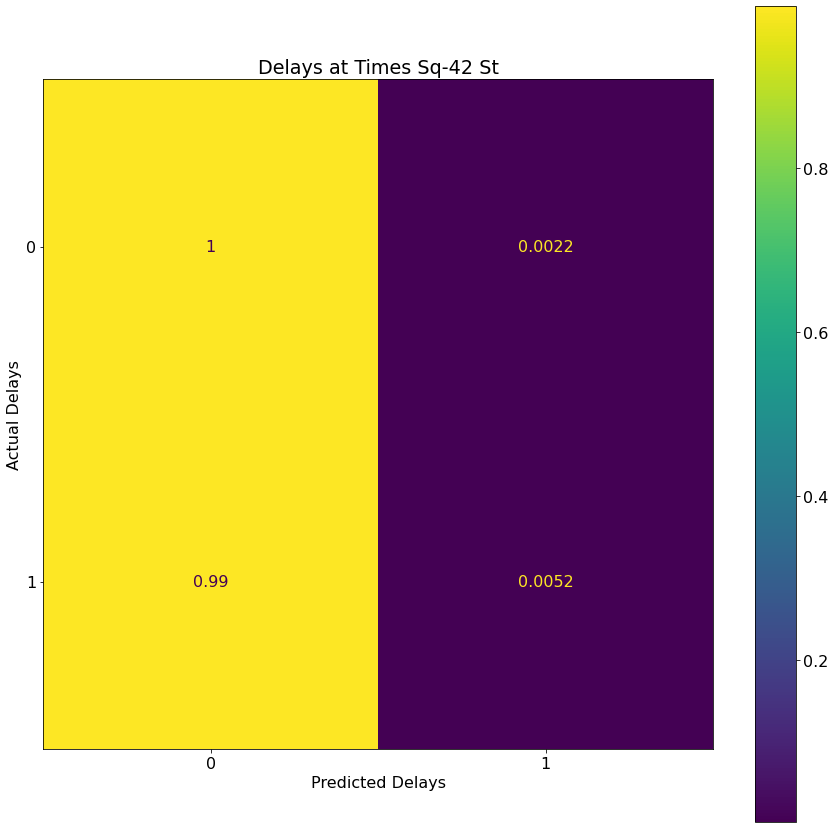

Pipeline(steps=[('bnb', BernoulliNB(alpha=0.2))])
0.8002309468822171
0.010328936914031464


In [167]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_title('Delays at Times Sq-42 St')
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

## 72 st-7 Av

In [103]:
X = df[features]
y = df['72 st (1/2/3)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y.value_counts()

0    67762
1    15375
Name: 72 st (1/2/3), dtype: int64

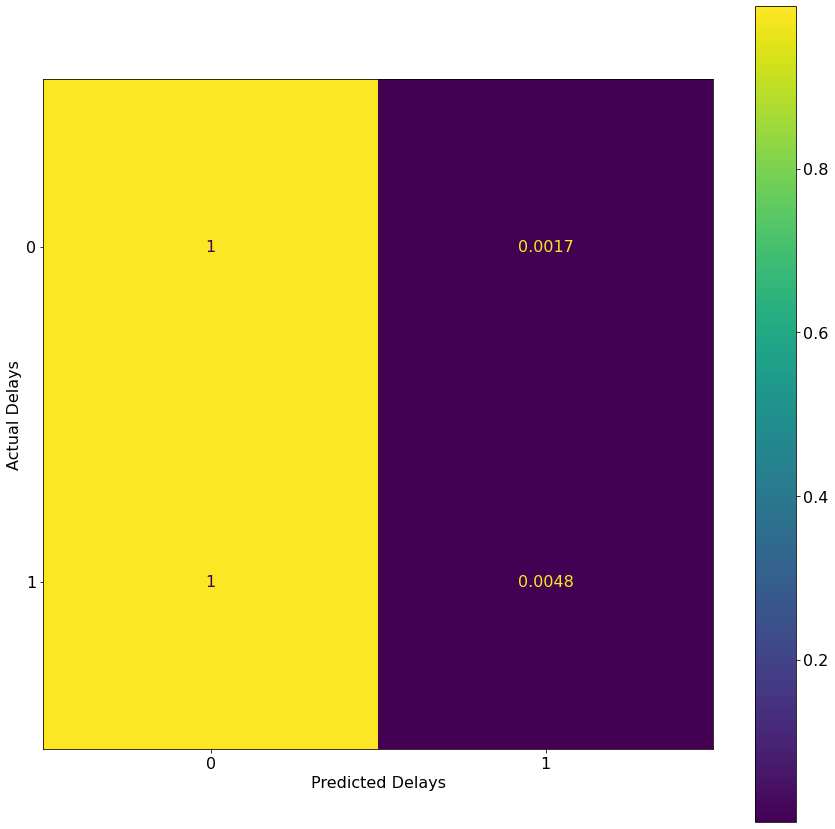

Pipeline(steps=[('bnb', BernoulliNB(alpha=0.5))])
0.8155151398511675
0.00964270340077486


In [104]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

## Grand Central-42 St

In [106]:
df['grand ctl-42 st (4/5/6/7)'] = df['grand ctl-42 st (4/5/6/7)'].apply(become_one)

In [107]:
X = df[features]
y = df['grand ctl-42 st (4/5/6/7)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y.value_counts()

0    61723
1    21414
Name: grand ctl-42 st (4/5/6/7), dtype: int64

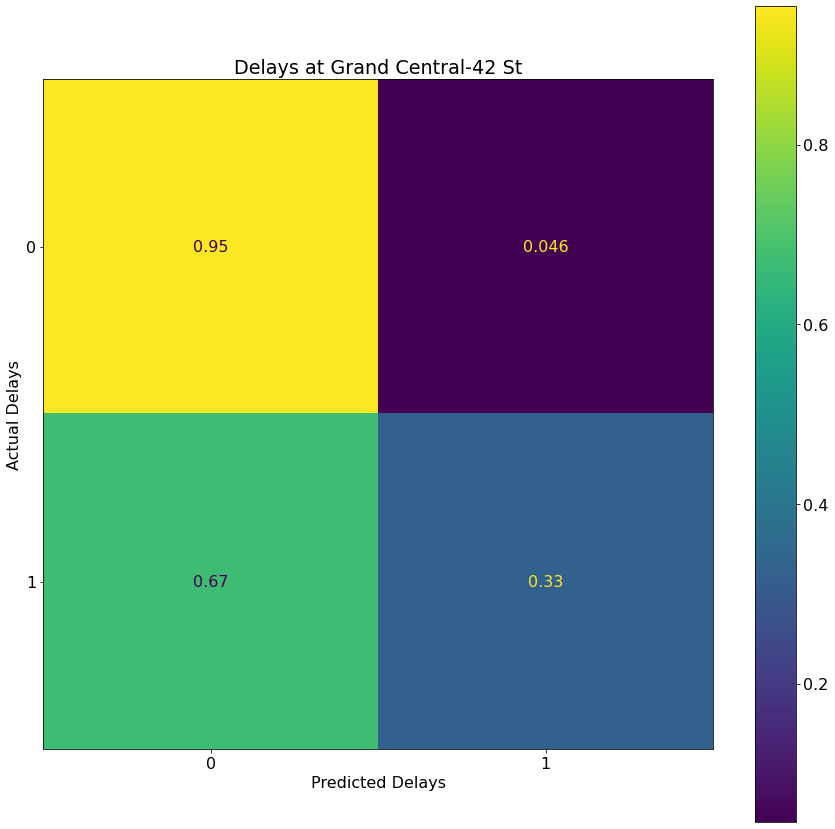

Pipeline(steps=[('bnb', BernoulliNB(alpha=0.5))])
0.792452527585322
0.45074487500530536


In [108]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
ax.set_title('Delays at Grand Central-42 St')
ax.set_xlabel('Predicted Delays')
ax.set_ylabel('Actual Delays')
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

In [30]:
features = ['rush_hour', 'weekend', 'mon', 'tue', 'wed', 'th', 'fri', 'bronx', 'brooklyn',
            'manhattan', 'queens','direction_bronx', 'direction_brooklyn', 'causes_station',
            'causes_train', 'causes_weather', 'causes_passenger', 'causes_other','direction_manhattan',
            'direction_queens', 'direction_unspecified', 'fastest_wind_spd','avg_wind_spd', 'major_conditions',
            'minor_conditions', 'neutral_conditions', 'clear_conditions', 'max_temp', 'avg_temp', 'min_temp',
            'prcp', 'snowfall', 'snowfall_depth', '28 st (6)']

In [31]:
X = df[features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

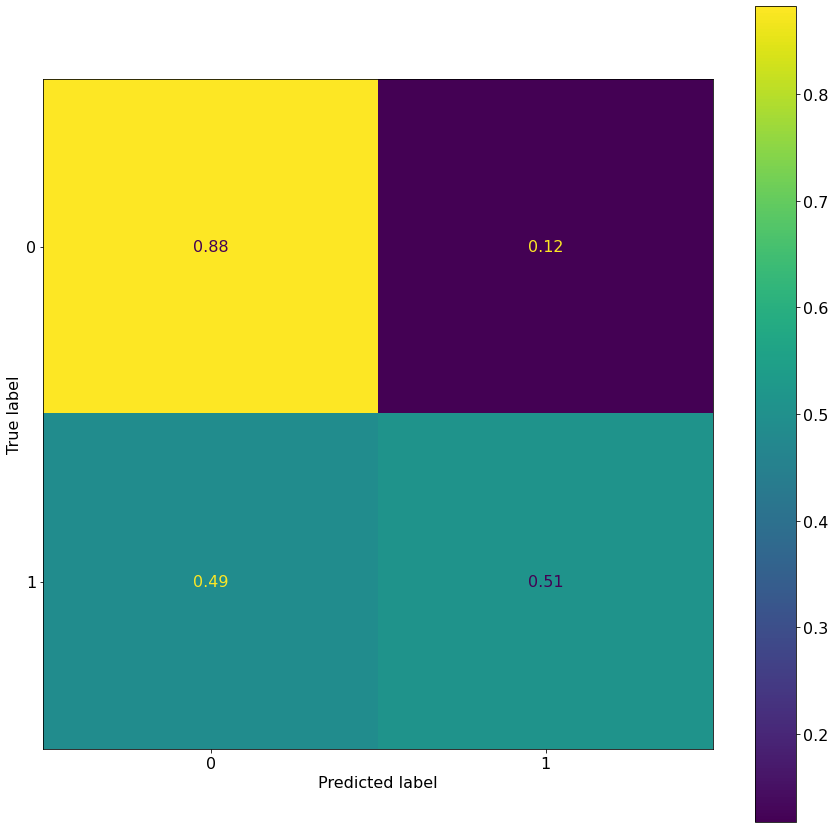

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.7353573261483192
0.6028544609978579


In [32]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

# Different feature types

In [33]:
time_features = ['rush_hour', 'weekend', 'mon', 'tue', 'wed', 'th', 'fri']
weather_features = ['fastest_wind_spd','avg_wind_spd', 'major_conditions','minor_conditions',
                    'neutral_conditions', 'clear_conditions', 'max_temp', 'avg_temp', 'min_temp',
                    'prcp', 'snowfall', 'snowfall_depth']
location_features = ['bronx', 'brooklyn','manhattan', 'queens','direction_bronx', 'direction_brooklyn',
                     'direction_manhattan','direction_queens', 'direction_unspecified']
cause_features = ['causes_station','causes_train', 'causes_weather', 'causes_passenger', 'causes_other']

In [34]:
X = df[time_features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

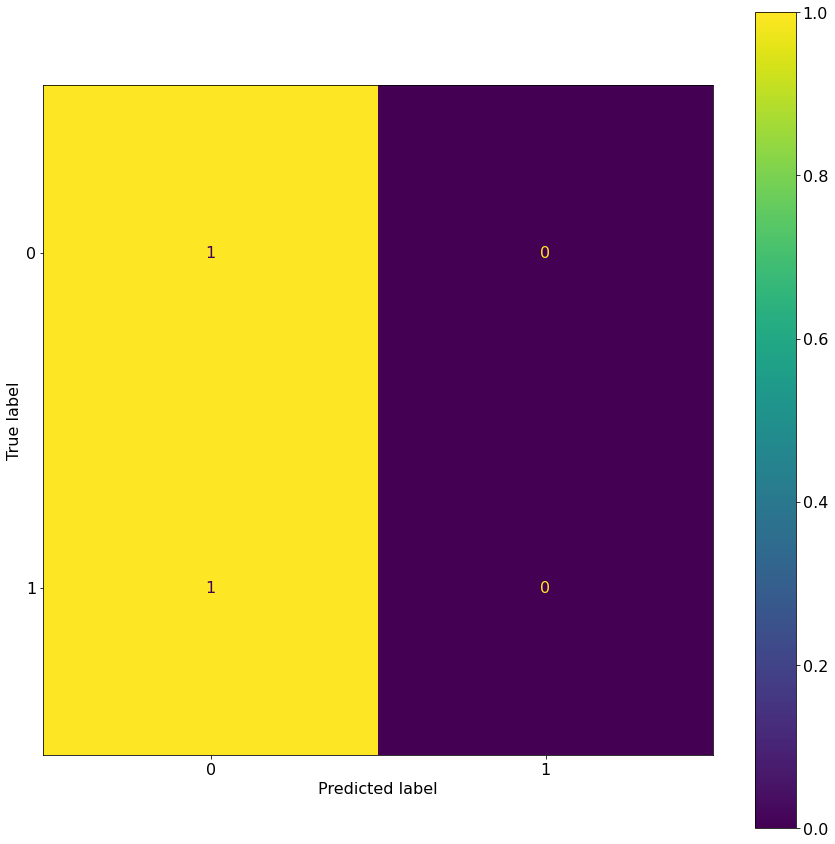

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.6055459327687965
0.0


In [35]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

In [36]:
X = df[weather_features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

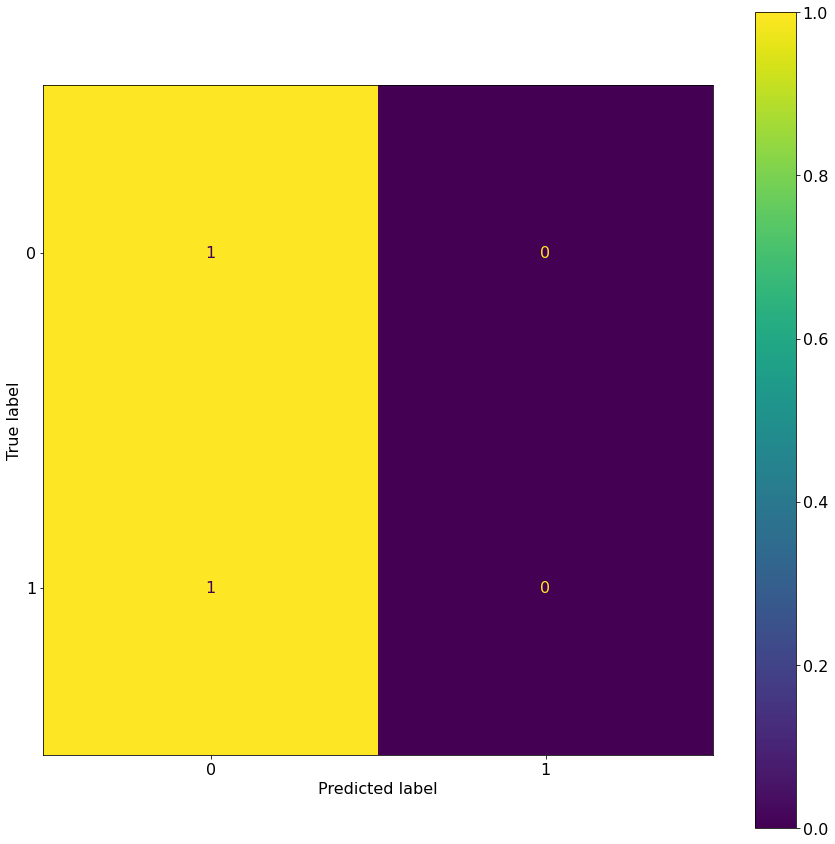

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.6055459327687965
0.0


In [37]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

In [38]:
X = df[location_features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

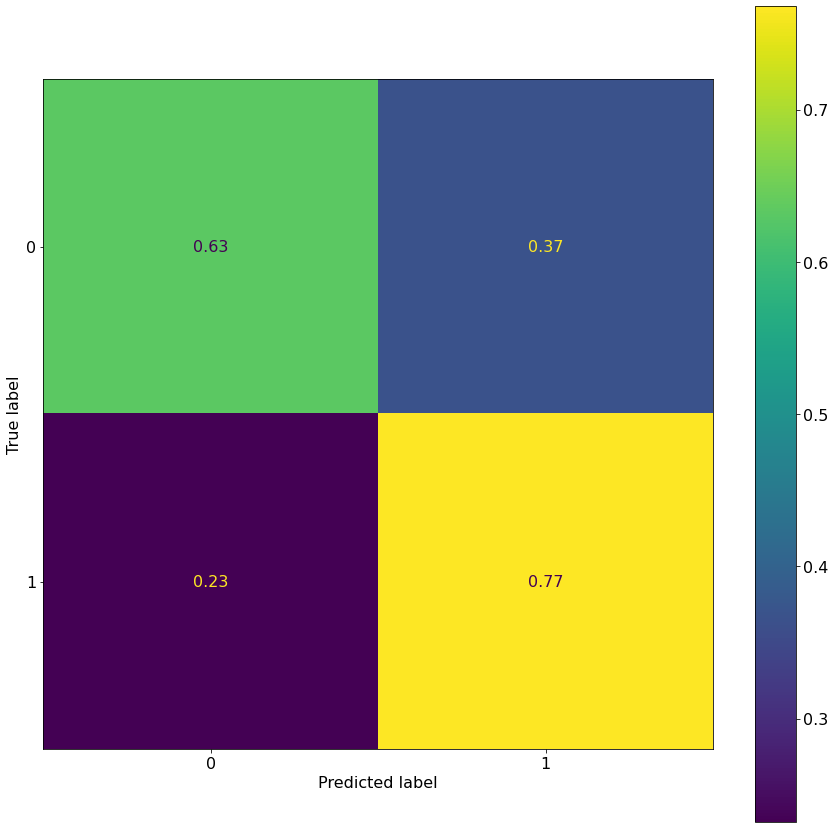

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.6855273287143957
0.6581828324384632


In [39]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

In [40]:
X = df[cause_features]
y = df['delayed_irt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

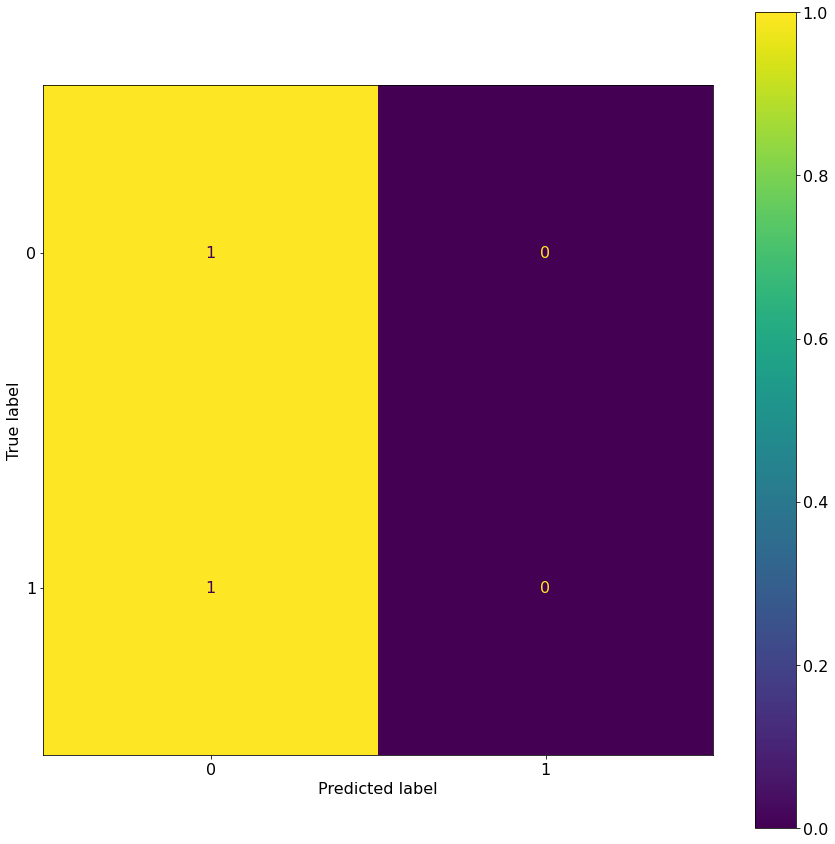

Pipeline(steps=[('bnb', BernoulliNB(alpha=1))])
0.6055459327687965
0.0


In [41]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))

# Location has the biggest effect

In [43]:
features = ['rush_hour', 'weekend', 'mon', 'tue', 'wed', 'th', 'fri', 'bronx', 'brooklyn',
            'manhattan', 'queens','direction_bronx', 'direction_brooklyn', 'causes_station',
            'causes_train', 'causes_weather', 'causes_passenger', 'causes_other','direction_manhattan',
            'direction_queens', 'direction_unspecified', 'fastest_wind_spd','avg_wind_spd', 'major_conditions',
            'minor_conditions', 'neutral_conditions', 'clear_conditions', 'max_temp', 'avg_temp', 'min_temp',
            'prcp', 'snowfall', 'snowfall_depth']

In [44]:
X = df[features]
y = df['times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
df['times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)'].value_counts()

0    66491
1    16646
Name: times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W), dtype: int64

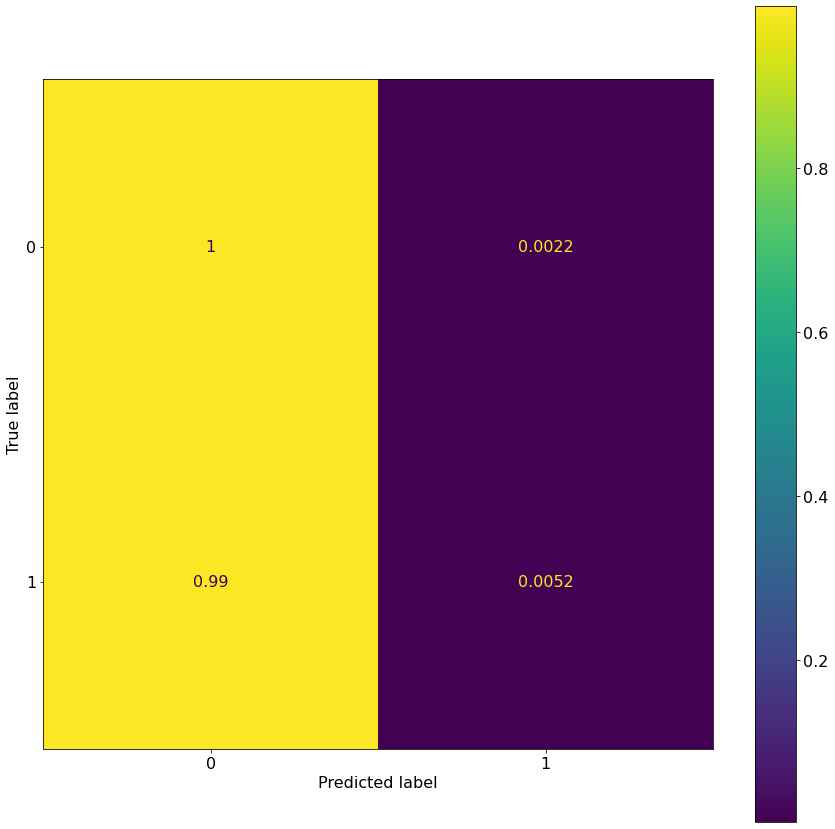

Pipeline(steps=[('bnb', BernoulliNB(alpha=0.2))])
0.8002309468822171
0.010328936914031464


In [45]:
parameters = {'bnb__alpha':[1,.9,.5,.2,0]}
pipe = Pipeline(steps=[('bnb',BernoulliNB())])
gsv = GridSearchCV(pipe, parameters,scoring='accuracy')
gsv.fit(X_train, y_train)

y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(gsv.best_estimator_, X_train, y_train, normalize='true', ax=ax)
plt.show()

# checking the best estimators from gsv
print(gsv.best_estimator_)

# checking accuracy and f1 scores
print(accuracy_score(y_train,y_pred))
print(f1_score(y_train, y_pred))